In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

%matplotlib inline

import sys

In [2]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

In [3]:
dat_train = pd.read_feather("../output/dat_train.feather")
dat_test = pd.read_feather("../output/dat_test.feather")


In [4]:
images_train = dat_train.loc[:,dat_train.columns != 'label']
labels_train = dat_train.loc[:,'label'].astype(int)
images_val = dat_test.loc[:,dat_test.columns != 'label']
labels_val = dat_test.loc[:,'label'].astype(int)

In [5]:
images_train = np.array(images_train)
labels_train = np.array(labels_train)
images_val = np.array(images_val)
labels_val = np.array(labels_val)

nepochs = 100
batch_size = 128

In [6]:
sm = SMOTE()
x_res_train, y_res_train = sm.fit_resample(images_train, labels_train)
x_res_val, y_res_val = sm.fit_resample(images_val, labels_val)

In [7]:
def build_model(n_layers,hidden):
    model=keras.Sequential()
    model.add(keras.layers.Flatten())
    for i1 in range(n_layers):
        model.add(keras.layers.Dense(hidden,activation="relu"))
    model.add(keras.layers.Dense(10,activation="softmax"))
    return model


# Scale Data

In [8]:
results=[]
layers_array = [1,2,3,4,5]
nodes_array = [16,32,64,128]
for n_layers  in layers_array:
    for hidden in nodes_array:
        model=build_model(n_layers,hidden)
        model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
        model.fit(x = x_res_train, y = y_res_train, batch_size=128, epochs =100, verbose=0, validation_data=(x_res_val,y_res_val))
        Y_pred=np.argmax(model.predict(x_res_val),axis=1)
        acc=np.mean(Y_pred==y_res_val)
        results.append((n_layers,hidden,acc))
        print(f">>>> {n_layers},{hidden}: {acc}")

>>>> 1,16: 0.7597137014314929
>>>> 1,32: 0.7597137014314929
>>>> 1,64: 0.7075664621676891
>>>> 1,128: 0.6860940695296524
>>>> 2,16: 0.5
>>>> 2,32: 0.6206543967280164
>>>> 2,64: 0.7116564417177914
>>>> 2,128: 0.5
>>>> 3,16: 0.5
>>>> 3,32: 0.5623721881390593
>>>> 3,64: 0.5
>>>> 3,128: 0.5
>>>> 4,16: 0.7229038854805726
>>>> 4,32: 0.5
>>>> 4,64: 0.7474437627811861
>>>> 4,128: 0.7280163599182005
>>>> 5,16: 0.6339468302658486
>>>> 5,32: 0.7310838445807771
>>>> 5,64: 0.5
>>>> 5,128: 0.5


In [9]:
data=pd.DataFrame(results,columns=["n_layers","hidden","accuracy"])
data

,n_layers,hidden,accuracy
0,1,16,0.759714
1,1,32,0.759714
2,1,64,0.707566
3,1,128,0.686094
4,2,16,0.500000
5,2,32,0.620654
6,2,64,0.711656
7,2,128,0.500000
8,3,16,0.500000
9,3,32,0.562372


In [10]:
best=data.iloc[data["accuracy"].idxmax()]
best_n_layers=int(best["n_layers"])
best_hidden=int(best["hidden"])
best

n_layers     1.000000
hidden      16.000000
accuracy     0.759714
Name: 0, dtype: float64

In [11]:
model = build_model(3,32)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
model.fit(x_res_train,y_res_train,
          verbose=0,batch_size=128, epochs =100,
         validation_data=(x_res_val,y_res_val))

In [12]:
Y_pred=np.argmax(model.predict(images_val),axis=1)
np.mean(Y_pred==labels_val)

0.275

In [13]:
from sklearn import metrics
prob=model.predict_proba(images_val)
fpr,tpr,threshold=metrics.roc_curve(labels_val,prob[:,1])
roc=np.c_[fpr,tpr,threshold]
data=pd.DataFrame(roc,columns=["fpr","tpr","threshold"])

auc=metrics.roc_auc_score(labels_val,prob[:,1])
print(auc)


0.7153595313104515


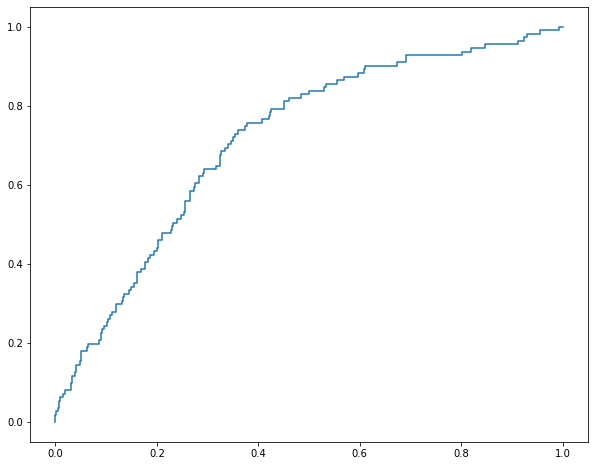

In [14]:
plt.figure(figsize=(10,8))
ax = plt.gca()
plt.plot(fpr,tpr)

# Imbalanced Data

In [15]:
results=[]
layers_array = [1,2,3,4,5]
nodes_array = [16,32,64,128]
for n_layers  in layers_array:
    for hidden in nodes_array:
        model=build_model(n_layers,hidden)
        model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
        model.fit(x = images_train, y = labels_train, batch_size=48, epochs =100, verbose=0, validation_data=(images_val,labels_val))
        Y_pred=np.argmax(model.predict(images_val),axis=1)
        acc=np.mean(Y_pred==labels_val)
        results.append((n_layers,hidden,acc))
        print(f">>>> {n_layers},{hidden}: {acc}")

>>>> 1,16: 0.815
>>>> 1,32: 0.8266666666666667
>>>> 1,64: 0.8233333333333334
>>>> 1,128: 0.815
>>>> 2,16: 0.185
>>>> 2,32: 0.815
>>>> 2,64: 0.815
>>>> 2,128: 0.815
>>>> 3,16: 0.815
>>>> 3,32: 0.815
>>>> 3,64: 0.82
>>>> 3,128: 0.815
>>>> 4,16: 0.815
>>>> 4,32: 0.8233333333333334
>>>> 4,64: 0.815
>>>> 4,128: 0.815
>>>> 5,16: 0.815
>>>> 5,32: 0.815
>>>> 5,64: 0.815
>>>> 5,128: 0.79


In [16]:
results=[]
layers_array = [1,2,3,4,5]
nodes_array = [16,32,64,128]
for n_layers  in layers_array:
    for hidden in nodes_array:
        model=build_model(n_layers,hidden)
        model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
        model.fit(x = images_train, y = labels_train, batch_size=128, epochs =100, verbose=0, validation_data=(images_val,labels_val))
        Y_pred=np.argmax(model.predict(images_val),axis=1)
        acc=np.mean(Y_pred==labels_val)
        results.append((n_layers,hidden,acc))
        print(f">>>> {n_layers},{hidden}: {acc}")

>>>> 1,16: 0.815
>>>> 1,32: 0.835
>>>> 1,64: 0.815
>>>> 1,128: 0.815
>>>> 2,16: 0.815
>>>> 2,32: 0.82
>>>> 2,64: 0.8233333333333334
>>>> 2,128: 0.825
>>>> 3,16: 0.815
>>>> 3,32: 0.815
>>>> 3,64: 0.815
>>>> 3,128: 0.815
>>>> 4,16: 0.82
>>>> 4,32: 0.82
>>>> 4,64: 0.8166666666666667
>>>> 4,128: 0.815
>>>> 5,16: 0.815
>>>> 5,32: 0.815
>>>> 5,64: 0.8166666666666667
>>>> 5,128: 0.82


In [17]:
model = build_model(3,16)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 
result = model.fit(x = images_train, y = labels_train, batch_size=128,epochs =100,validation_data=(images_val,labels_val))


Train on 2400 samples, validate on 600 samples
Epoch 1/100
2400/2400 [==============================] - 1s 233us/sample - loss: 23.0128 - accuracy: 0.5929 - val_loss: 2.2580 - val_accuracy: 0.8150
Epoch 2/100
2400/2400 [==============================] - 0s 49us/sample - loss: 2.2319 - accuracy: 0.7971 - val_loss: 2.1989 - val_accuracy: 0.8150
Epoch 3/100
2400/2400 [==============================] - 0s 48us/sample - loss: 2.1685 - accuracy: 0.7971 - val_loss: 2.1291 - val_accuracy: 0.8150
Epoch 4/100
2400/2400 [==============================] - 0s 48us/sample - loss: 2.0936 - accuracy: 0.7971 - val_loss: 2.0464 - val_accuracy: 0.8150
Epoch 5/100
2400/2400 [==============================] - 0s 48us/sample - loss: 2.0048 - accuracy: 0.7971 - val_loss: 1.9487 - val_accuracy: 0.8150
Epoch 6/100
2400/2400 [==============================] - 0s 52us/sample - loss: 1.9008 - accuracy: 0.7971 - val_loss: 1.8349 - val_accuracy: 0.8150
Epoch 7/100
2400/2400 [==============================] - 0s 52u

Epoch 56/100
2400/2400 [==============================] - 0s 49us/sample - loss: 0.5098 - accuracy: 0.7971 - val_loss: 0.4848 - val_accuracy: 0.8150
Epoch 57/100
2400/2400 [==============================] - 0s 55us/sample - loss: 0.5096 - accuracy: 0.7971 - val_loss: 0.4848 - val_accuracy: 0.8150
Epoch 58/100
2400/2400 [==============================] - 0s 49us/sample - loss: 0.5094 - accuracy: 0.7971 - val_loss: 0.4843 - val_accuracy: 0.8150
Epoch 59/100
2400/2400 [==============================] - 0s 48us/sample - loss: 0.5093 - accuracy: 0.7971 - val_loss: 0.4845 - val_accuracy: 0.8150
Epoch 60/100
2400/2400 [==============================] - 0s 48us/sample - loss: 0.5091 - accuracy: 0.7971 - val_loss: 0.4844 - val_accuracy: 0.8150
Epoch 61/100
2400/2400 [==============================] - 0s 48us/sample - loss: 0.5089 - accuracy: 0.7971 - val_loss: 0.4837 - val_accuracy: 0.8150
Epoch 62/100
2400/2400 [==============================] - 0s 53us/sample - loss: 0.5087 - accuracy: 0.7971

In [18]:
Y_pred=np.argmax(model.predict(images_val),axis=1)
np.mean(Y_pred==labels_val)

0.815

In [19]:
sum(Y_pred)

0

In [20]:
from sklearn import metrics
prob=model.predict_proba(images_val)
fpr,tpr,threshold=metrics.roc_curve(labels_val,prob[:,1])
roc=np.c_[fpr,tpr,threshold]
data=pd.DataFrame(roc,columns=["fpr","tpr","threshold"])

auc=metrics.roc_auc_score(labels_val,prob[:,1])
print(auc)

0.5


In [21]:
model = build_model(1,64)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 
result = model.fit(x = images_train, y = labels_train, batch_size=48, epochs =100,validation_data=(images_val,labels_val))


Train on 2400 samples, validate on 600 samples
Epoch 1/100
2400/2400 [==============================] - 1s 224us/sample - loss: 117.0627 - accuracy: 0.6600 - val_loss: 47.4489 - val_accuracy: 0.8150
Epoch 2/100
2400/2400 [==============================] - 0s 100us/sample - loss: 106.8408 - accuracy: 0.6746 - val_loss: 144.9669 - val_accuracy: 0.8150
Epoch 3/100
2400/2400 [==============================] - 0s 113us/sample - loss: 48.2407 - accuracy: 0.6971 - val_loss: 7.3412 - val_accuracy: 0.8133
Epoch 4/100
2400/2400 [==============================] - 0s 111us/sample - loss: 28.3880 - accuracy: 0.6988 - val_loss: 52.9636 - val_accuracy: 0.8150
Epoch 5/100
2400/2400 [==============================] - 0s 109us/sample - loss: 28.8687 - accuracy: 0.6933 - val_loss: 19.6756 - val_accuracy: 0.8150
Epoch 6/100
2400/2400 [==============================] - 0s 108us/sample - loss: 95.7395 - accuracy: 0.6750 - val_loss: 23.4580 - val_accuracy: 0.8150
Epoch 7/100
2400/2400 [======================

Epoch 55/100
2400/2400 [==============================] - 0s 108us/sample - loss: 7.4910 - accuracy: 0.7600 - val_loss: 11.1321 - val_accuracy: 0.8150
Epoch 56/100
2400/2400 [==============================] - 0s 115us/sample - loss: 12.4807 - accuracy: 0.7138 - val_loss: 12.3064 - val_accuracy: 0.4400
Epoch 57/100
2400/2400 [==============================] - 0s 105us/sample - loss: 4.1074 - accuracy: 0.7975 - val_loss: 6.9337 - val_accuracy: 0.5800
Epoch 58/100
2400/2400 [==============================] - 0s 109us/sample - loss: 3.3367 - accuracy: 0.7996 - val_loss: 2.8901 - val_accuracy: 0.8317
Epoch 59/100
2400/2400 [==============================] - 0s 108us/sample - loss: 3.2836 - accuracy: 0.8037 - val_loss: 3.6963 - val_accuracy: 0.8317
Epoch 60/100
2400/2400 [==============================] - 0s 113us/sample - loss: 4.9934 - accuracy: 0.7738 - val_loss: 3.3969 - val_accuracy: 0.8333
Epoch 61/100
2400/2400 [==============================] - 0s 108us/sample - loss: 16.5213 - accur

In [22]:
Y_pred=np.argmax(model.predict(images_val),axis=1)
np.mean(Y_pred==labels_val)

0.8316666666666667

In [23]:
sum(Y_pred)

104

In [24]:
from sklearn import metrics
prob=model.predict_proba(images_val)
fpr,tpr,threshold=metrics.roc_curve(labels_val,prob[:,1])
roc=np.c_[fpr,tpr,threshold]
data=pd.DataFrame(roc,columns=["fpr","tpr","threshold"])

auc=metrics.roc_auc_score(labels_val,prob[:,1])
print(auc)

0.810239687540301


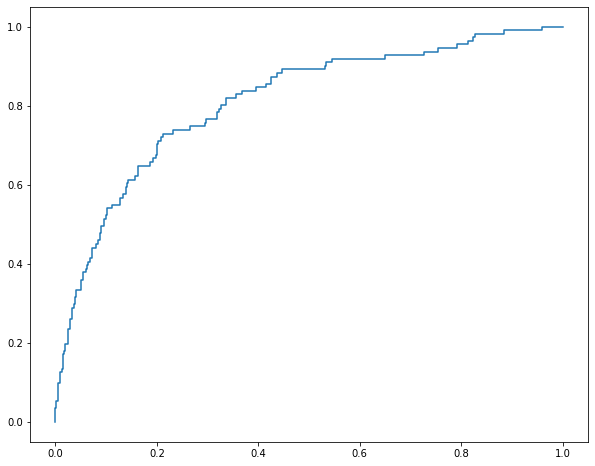

In [25]:
plt.figure(figsize=(10,8))
ax = plt.gca()
plt.plot(fpr,tpr)